### Langkah 0 - Import Library

In [312]:
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd

In [313]:
train_dir = 'Minggu 4/images/training/'
test_dir = 'Minggu 4/images/test/'

### Langkah 1 - Load Data dan Visualisasikan

In [314]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

In [315]:
train_img = load_dataset(train_dir)

In [316]:
train_img[0]

(array([[[250, 255, 254],
         [250, 255, 254],
         [251, 255, 254],
         ...,
         [149, 137, 123],
         [186, 174, 160],
         [174, 162, 148]],
 
        [[250, 255, 254],
         [250, 255, 254],
         [251, 255, 254],
         ...,
         [153, 141, 127],
         [174, 162, 148],
         [174, 162, 148]],
 
        [[250, 255, 254],
         [250, 255, 254],
         [251, 255, 254],
         ...,
         [167, 155, 141],
         [174, 162, 148],
         [191, 179, 165]],
 
        ...,
 
        [[118, 104, 103],
         [ 79,  68,  64],
         [ 88,  74,  73],
         ...,
         [109, 110, 115],
         [101, 102, 107],
         [ 85,  86,  91]],
 
        [[125, 114, 112],
         [ 81,  71,  69],
         [ 91,  80,  78],
         ...,
         [104, 105, 110],
         [111, 112, 117],
         [ 97,  98, 103]],
 
        [[171, 161, 160],
         [114, 106, 104],
         [112, 102, 101],
         ...,
         [ 99, 100, 105],
  

In [317]:
pick_random = np.random.randint(0, len(train_img))

print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 150
(439, 640, 3)


In [318]:
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Shape	: (469, 640, 3)
Label	: night


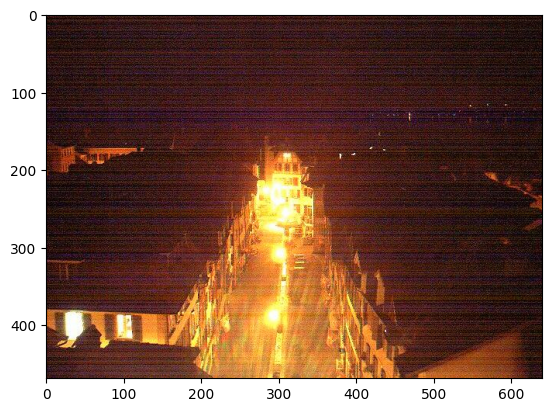

In [319]:
random_img_viz(train_img)

### Langkah 2 - Pra Pengolahan Data

In [320]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

In [321]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1
    
    return num_val

In [322]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))
    
    return std_img_list

In [323]:
train_std_img_list = preprocess(train_img)

In [324]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 79
(600, 1100, 3)


Shape	: (600, 1100, 3)
Label	: 1


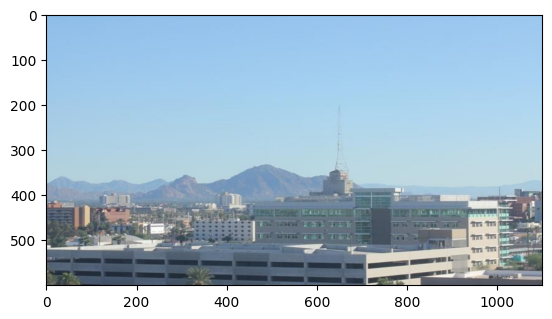

In [325]:
random_img_viz(train_std_img_list)

### Langkah 3 - Ekstraksi Fitur

In [326]:
def avg_brightness(image):
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    sum_brightness = np.sum(img_hsv[:, :, 2])
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

Image 144
Avg Brightness: 25.2343


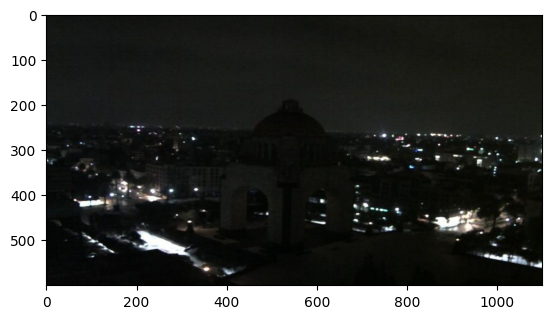

In [327]:
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brightness: {avg_img:.4f}')
plt.imshow(feature_img)

### Langkah 4 - Klasifikasi dengan Metode Threshold

In [328]:
def predict_label(img, threshold):
    avg = avg_brightness(img)
    pred = 0

    if avg > threshold:
        pred = 1

    return pred

Image 98
Actual label: 1
Predicted label: 0


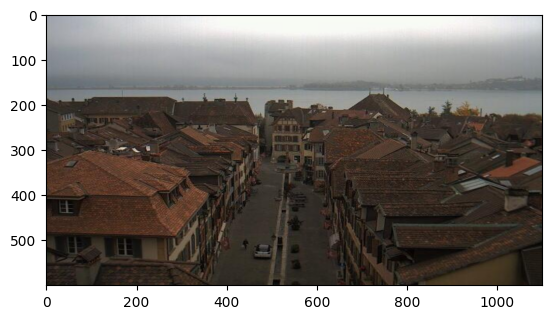

In [329]:
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

### Langkah 5 - Evaluasi (Manual)

In [330]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        img = file[0]
        label = file[1]

        pred_label = predict_label(img, threshold)

        if pred_label != label:
            miss_labels.append((img, pred_label, label))
        
    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

In [331]:
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417


In [332]:
test_img = load_dataset(test_dir)

test_std_img_list = preprocess(test_img)

evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


## Another Way - Membuat Feature Vectors dan Klasifikasi dengan SVM

### Langkah 1 alternatif - Membuat Feature Vectors

In [333]:
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0])
        img_label = img[1]

        avg_list.append(img_avg)
        labels.append(img_label)

    data = np.column_stack((avg_list, labels))
    
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

In [334]:
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,170.984826,1.0
1,102.086292,1.0
2,128.610358,1.0
3,129.322923,1.0
4,112.258486,1.0


In [335]:
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,109.134433,1.0
1,185.917073,1.0
2,157.650256,1.0
3,168.672429,1.0
4,184.670024,1.0


### Langkah 2 alternatif

In [336]:
from sklearn.svm import SVC

X_train = train_avg_img.iloc[:, 0].values.reshape(-1, 1)
y_train = train_avg_img.iloc[:, 1]
X_test = test_avg_img.iloc[:, 0].values.reshape(-1, 1)
y_test = test_avg_img.iloc[:, 1]

model = SVC()
model.fit(X_train, y_train)

SVC()

### Langkah 3 alternatif

In [337]:
from sklearn.metrics import accuracy_score

y_train_pred = model.predict(X_train)

acc_train = accuracy_score(y_train, y_train_pred)

y_test_pred = model.predict(X_test)

acc_test = accuracy_score(y_test, y_test_pred)

print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9
